In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('FactCreditData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  int64  
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  in

In [3]:
del data['ID']
del data['Customer_ID']
del data['Month_id']

In [4]:
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age,Payment_of_Min_Amount_ID,Payment_Behaviour_id,Occupation_id,Credit_Mix_ID,Credit_Score_ID
0,23,19114.12,1824.843333,3,4,3,4,3,7,11,...,26.822620,49.574949,80.415295,312.494089,2,2,1,1,4,1
1,23,19114.12,4194.170850,3,4,3,4,21,31,11,...,31.944960,49.574949,118.280222,284.629163,2,2,2,1,1,1
2,33,19114.12,4194.170850,3,4,3,4,3,7,9,...,28.609352,49.574949,81.699521,331.209863,2,2,3,1,1,1
3,23,19114.12,4194.170850,3,4,3,4,5,4,6,...,31.377862,49.574949,199.458074,223.451310,2,2,4,1,1,1
4,23,19114.12,1824.843333,3,4,3,4,6,31,11,...,24.797347,49.574949,41.420153,341.489231,2,2,5,1,1,1


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Class=1, n=17828 (17.828%)
Class=2, n=53174 (53.174%)
Class=3, n=28998 (28.998%)


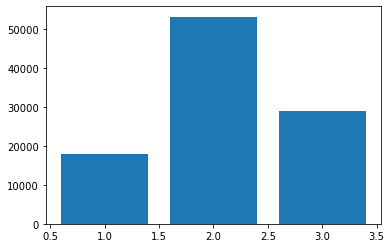

In [6]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=53174 (33.333%)
Class=2, n=53174 (33.333%)
Class=3, n=53174 (33.333%)


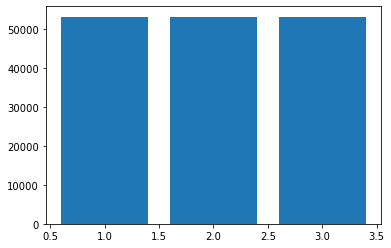

In [7]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.10, random_state = 4)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, random_state=5)  
rf_clf.fit(X_train, Y_train)  
rf_predictions = rf_clf.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(Y_test,rf_predictions ))  
print(accuracy_score(Y_test, rf_predictions ))
print(f1_score(Y_test, rf_predictions, average='weighted'))

              precision    recall  f1-score   support

           1       0.82      0.92      0.87      5304
           2       0.79      0.72      0.76      5275
           3       0.85      0.83      0.84      5374

    accuracy                           0.82     15953
   macro avg       0.82      0.82      0.82     15953
weighted avg       0.82      0.82      0.82     15953

0.8216636369334921
0.8199273275679387


In [11]:
import pickle
#pickle.dump(rf_clf, open('Model.pkl','wb'))
data = {"model": rf_clf}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [12]:

def load_model():
    with open(r"C:\Users\Siddhant.Panda\Desktop\MiniProject\ML\saved_steps.pkl", 'rb') as file:
        data = pickle.load(file)
    return data

load_model() 

{'model': RandomForestClassifier(n_estimators=10, random_state=5)}

In [49]:
pickle.dump(rf_clf, open('RandomForestModel.pkl','wb'))
'''
ofile = bz2.BZ2File("BinaryData",'wb')
pickle.dump(rf_clf,ofile)
ofile.close()
'''
'''
def load_model():
    with open('RandomForestModel.pkl', 'rb') as file:
        data = pickle.load(file)
    return load_model()
'''

"\ndef load_model():\n    with open('RandomForestModel.pkl', 'rb') as file:\n        data = pickle.load(file)\n    return load_model()\n"

In [16]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)
rf_predictions = model.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.8616115	total: 246ms	remaining: 24.4s
1:	learn: 0.7730382	total: 356ms	remaining: 17.4s
2:	learn: 0.7358386	total: 440ms	remaining: 14.2s
3:	learn: 0.7169709	total: 524ms	remaining: 12.6s
4:	learn: 0.6965211	total: 605ms	remaining: 11.5s
5:	learn: 0.6909595	total: 674ms	remaining: 10.6s
6:	learn: 0.6842213	total: 753ms	remaining: 10s
7:	learn: 0.6780916	total: 841ms	remaining: 9.68s
8:	learn: 0.6728668	total: 938ms	remaining: 9.48s
9:	learn: 0.6683980	total: 1.05s	remaining: 9.43s
10:	learn: 0.6634212	total: 1.12s	remaining: 9.1s
11:	learn: 0.6593341	total: 1.19s	remaining: 8.7s
12:	learn: 0.6544953	total: 1.26s	remaining: 8.44s
13:	learn: 0.6512291	total: 1.38s	remaining: 8.5s
14:	learn: 0.6493197	total: 1.47s	remaining: 8.34s
15:	learn: 0.6475652	total: 1.52s	remaining: 7.99s
16:	learn: 0.6450766	total: 1.62s	remaining: 7.89s
17:	learn: 0.6428129	total: 1.77s	remaining: 8.08s
18:	learn: 0.6405575	total: 1.87s	remaining: 7.99s
19:	learn: 0.6376426	

In [17]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(Y_test,rf_predictions ))  
print(accuracy_score(Y_test, rf_predictions ))
print(f1_score(Y_test, rf_predictions, average='weighted'))

              precision    recall  f1-score   support

           1       0.77      0.85      0.81     16078
           2       0.73      0.67      0.70     15795
           3       0.79      0.78      0.78     15984

    accuracy                           0.77     47857
   macro avg       0.77      0.77      0.76     47857
weighted avg       0.77      0.77      0.76     47857

0.7659903462398395
0.764279839759769


In [12]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [12]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    #basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    #basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    return basedModels

In [13]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=None)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [14]:
class PlotBoxR(object):
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.507249 (0.003743)
LDA: 0.665893 (0.004579)
KNN: 0.754408 (0.004102)
CART: 0.731706 (0.003799)
NB: 0.545148 (0.002023)
AB: 0.703900 (0.004216)
